In [1]:
#start analysis of naloxone data
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#plot for Naloxone administrations and number of survivals
#start with summing naloxone administrations

naloxone2018 = pd.read_csv("clean data/naloxone_by_county.csv")
naloxone2018.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18
0,Allegheny,15,13,37,56,58,81,79,63,72,44,69,54
1,Beaver,1,2,5,4,1,7,6,9,1,6,5,5
2,Berks,5,0,7,7,10,5,10,7,10,6,8,8
3,Bucks,16,13,19,43,63,39,58,62,70,55,55,48
4,Cambria,1,2,7,10,13,7,2,12,12,7,7,4


In [3]:
#import 2019 data
naloxone2019 = pd.read_csv("clean data/naloxone2019.csv")
naloxone2019.head()

,Unnamed: 0,County,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19,Total
0,0,Adams,1.0,3.0,4.0,6.0,1.0,2.0,NaN,1.0,18.0
1,1,Allegheny,37.0,40.0,35.0,35.0,42.0,47.0,60.0,20.0,316.0
2,2,Armstrong,1.0,6.0,3.0,2.0,1.0,1.0,3.0,NaN,17.0
3,3,Beaver,3.0,1.0,7.0,2.0,1.0,2.0,0.0,1.0,17.0
4,4,Berks,7.0,5.0,6.0,9.0,11.0,5.0,6.0,0.0,49.0


In [4]:
#keep only month and county names for 2019
naloxone2019 = naloxone2019[["County", "Jan19", "Feb19", "Mar19", "Apr19", "May19", 
                             "Jun19", "Jul19", "Aug19"]]
naloxone2019

,County,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19
0,Adams,1.0,3.0,4.0,6.0,1.0,2.0,NaN,1.0
1,Allegheny,37.0,40.0,35.0,35.0,42.0,47.0,60.0,20.0
2,Armstrong,1.0,6.0,3.0,2.0,1.0,1.0,3.0,NaN
3,Beaver,3.0,1.0,7.0,2.0,1.0,2.0,0.0,1.0
4,Berks,7.0,5.0,6.0,9.0,11.0,5.0,6.0,0.0
5,Blair,3.0,NaN,1.0,3.0,1.0,NaN,2.0,0.0
6,Bucks,33.0,25.0,24.0,52.0,57.0,32.0,37.0,12.0
7,Butler,4.0,3.0,1.0,4.0,4.0,3.0,6.0,NaN
8,Cambria,8.0,5.0,13.0,5.0,16.0,7.0,9.0,4.0
9,Carbon,3.0,8.0,4.0,6.0,8.0,5.0,7.0,7.0


In [5]:
#merge dataframes
naloxone_2018_2019 = pd.merge(naloxone2018, naloxone2019, on="County", how="outer")
naloxone_2018_2019

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,...,Nov18,Dec18,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19
0,Allegheny,15.0,13.0,37.0,56.0,58.0,81.0,79.0,63.0,72.0,...,69.0,54.0,37.0,40.0,35.0,35.0,42.0,47.0,60.0,20.0
1,Beaver,1.0,2.0,5.0,4.0,1.0,7.0,6.0,9.0,1.0,...,5.0,5.0,3.0,1.0,7.0,2.0,1.0,2.0,0.0,1.0
2,Berks,5.0,0.0,7.0,7.0,10.0,5.0,10.0,7.0,10.0,...,8.0,8.0,7.0,5.0,6.0,9.0,11.0,5.0,6.0,0.0
3,Bucks,16.0,13.0,19.0,43.0,63.0,39.0,58.0,62.0,70.0,...,55.0,48.0,33.0,25.0,24.0,52.0,57.0,32.0,37.0,12.0
4,Cambria,1.0,2.0,7.0,10.0,13.0,7.0,2.0,12.0,12.0,...,7.0,4.0,8.0,5.0,13.0,5.0,16.0,7.0,9.0,4.0
5,Carbon,0.0,2.0,3.0,16.0,5.0,2.0,2.0,4.0,13.0,...,1.0,2.0,3.0,8.0,4.0,6.0,8.0,5.0,7.0,7.0
6,Centre,2.0,1.0,4.0,1.0,1.0,11.0,4.0,4.0,1.0,...,0.0,4.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN
7,Chester,1.0,2.0,26.0,24.0,41.0,35.0,23.0,20.0,27.0,...,14.0,29.0,15.0,9.0,31.0,12.0,4.0,13.0,23.0,7.0
8,Cumberland,1.0,2.0,2.0,1.0,12.0,5.0,7.0,6.0,3.0,...,5.0,2.0,6.0,7.0,5.0,5.0,8.0,11.0,6.0,5.0
9,Dauphin,7.0,11.0,10.0,9.0,19.0,12.0,13.0,20.0,9.0,...,2.0,17.0,4.0,3.0,1.0,13.0,19.0,23.0,10.0,1.0


In [6]:
#add summary column for year
naloxone_2018_2019["Total"]= naloxone_2018_2019.sum(axis=1)
naloxone_2018_2019.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,...,Dec18,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19,Total
0,Allegheny,15.0,13.0,37.0,56.0,58.0,81.0,79.0,63.0,72.0,...,54.0,37.0,40.0,35.0,35.0,42.0,47.0,60.0,20.0,957.0
1,Beaver,1.0,2.0,5.0,4.0,1.0,7.0,6.0,9.0,1.0,...,5.0,3.0,1.0,7.0,2.0,1.0,2.0,0.0,1.0,69.0
2,Berks,5.0,0.0,7.0,7.0,10.0,5.0,10.0,7.0,10.0,...,8.0,7.0,5.0,6.0,9.0,11.0,5.0,6.0,0.0,132.0
3,Bucks,16.0,13.0,19.0,43.0,63.0,39.0,58.0,62.0,70.0,...,48.0,33.0,25.0,24.0,52.0,57.0,32.0,37.0,12.0,813.0
4,Cambria,1.0,2.0,7.0,10.0,13.0,7.0,2.0,12.0,12.0,...,4.0,8.0,5.0,13.0,5.0,16.0,7.0,9.0,4.0,151.0


In [7]:
#summarize months
naloxone_months = naloxone_2018_2019.sum(axis=0)
naloxone_months = naloxone_months.drop(labels=["County"])
naloxone_months = pd.DataFrame(naloxone_months)
naloxone_months = naloxone_months.rename(columns={0: "Naloxone_Admin"})
naloxone_months = naloxone_months.reset_index()
naloxone_months = naloxone_months.rename(columns={"index": "months"})
naloxone_months

,months,Naloxone_Admin
0,Jan18,184
1,Feb18,160
2,Mar18,330
3,Apr18,390
4,May18,430
5,Jun18,436
6,Jul18,448
7,Aug18,397
8,Sep18,422
9,Oct18,332


In [8]:
#now do same for survival
#start with importing 2018 survival data
survival2018 = pd.read_csv("clean data/survival_numbers_after_naloxone.csv")
#survival2018["Total"]=survival2018.sum(axis=1)
survival2018.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,Oct18,Nov18,Dec18
0,Allegheny,15,13,37,56,58,81,79,63,72,44,69,54
1,Beaver,1,2,5,4,1,7,6,9,1,6,5,5
2,Bucks,16,13,19,43,63,39,58,62,70,55,55,48
3,Cambria,1,2,7,10,13,7,2,12,12,7,7,4
4,Chester,1,2,26,24,41,35,23,20,27,17,14,29


In [9]:
#now import 2019 survival data
survival2019 = pd.read_csv("clean data/survival2019_bymonth.csv")
survival2019 = survival2019[["County", "Jan19", "Feb19", "Mar19", "Apr19", "May19", "Jun19", 
                            "Jul19", "Aug19"]]
survival2019.head()

,County,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19
0,Adams,1.0,3.0,2.0,6.0,1.0,2.0,NaN,1.0
1,Allegheny,36.0,38.0,34.0,30.0,32.0,43.0,57.0,17.0
2,Armstrong,1.0,6.0,3.0,2.0,1.0,1.0,2.0,NaN
3,Beaver,3.0,0.0,5.0,2.0,1.0,1.0,NaN,1.0
4,Berks,5.0,4.0,6.0,9.0,10.0,5.0,6.0,NaN


In [10]:
#merge into one df
survival = pd.merge(survival2018, survival2019, on="County", how="outer")

survival.head()

,County,Jan18,Feb18,Mar18,Apr18,May18,Jun18,Jul18,Aug18,Sep18,...,Nov18,Dec18,Jan19,Feb19,Mar19,Apr19,May19,Jun19,Jul19,Aug19
0,Allegheny,15.0,13.0,37.0,56.0,58.0,81.0,79.0,63.0,72.0,...,69.0,54.0,36.0,38.0,34.0,30.0,32.0,43.0,57.0,17.0
1,Beaver,1.0,2.0,5.0,4.0,1.0,7.0,6.0,9.0,1.0,...,5.0,5.0,3.0,0.0,5.0,2.0,1.0,1.0,NaN,1.0
2,Bucks,16.0,13.0,19.0,43.0,63.0,39.0,58.0,62.0,70.0,...,55.0,48.0,29.0,23.0,19.0,44.0,49.0,31.0,32.0,12.0
3,Cambria,1.0,2.0,7.0,10.0,13.0,7.0,2.0,12.0,12.0,...,7.0,4.0,1.0,5.0,2.0,1.0,2.0,5.0,8.0,3.0
4,Chester,1.0,2.0,26.0,24.0,41.0,35.0,23.0,20.0,27.0,...,14.0,29.0,10.0,6.0,28.0,10.0,4.0,13.0,21.0,7.0


In [11]:
#summarize survival by months
survival_months = survival.sum(axis=0, skipna = True)
survival_months = survival_months.drop(labels=["County"])
survival_months = pd.DataFrame(survival_months)
survival_months = survival_months.rename(columns={0: "Survival"})
survival_months = survival_months.reset_index()
survival_months = survival_months.rename(columns={"index": "months"})
survival_months

,months,Survival
0,Jan18,168
1,Feb18,154
2,Mar18,313
3,Apr18,363
4,May18,410
5,Jun18,404
6,Jul18,426
7,Aug18,372
8,Sep18,392
9,Oct18,322


In [12]:
#merge dataframes and calculate survival rate
nal_and_survive = pd.merge(naloxone_months, survival_months, on="months", how="outer")
nal_and_survive

,months,Naloxone_Admin,Survival
0,Jan18,184,168
1,Feb18,160,154
2,Mar18,330,313
3,Apr18,390,363
4,May18,430,410
5,Jun18,436,404
6,Jul18,448,426
7,Aug18,397,372
8,Sep18,422,392
9,Oct18,332,322


In [13]:
#add rate column
nal_and_survive["rate"] = nal_and_survive["Survival"]/nal_and_survive["Naloxone_Admin"]*100
nal_and_survive = nal_and_survive.dropna()
nal_and_survive = nal_and_survive.set_index("months")
nal_and_survive


,Naloxone_Admin,Survival,rate
months,,,
Jan18,184,168,91.3043
Feb18,160,154,96.25
Mar18,330,313,94.8485
Apr18,390,363,93.0769
May18,430,410,95.3488
Jun18,436,404,92.6606
Jul18,448,426,95.0893
Aug18,397,372,93.7028
Sep18,422,392,92.891


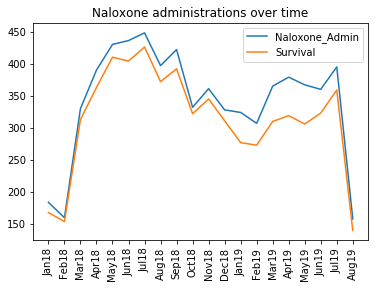

In [14]:
plt.plot(nal_and_survive["Naloxone_Admin"])
plt.plot(nal_and_survive["Survival"])
plt.xticks(rotation="vertical")
plt.title("Naloxone administrations over time")
plt.legend()

plt.savefig("naloxone_admin_over_time.png")
plt.show()

In [15]:
#get totals by county for survival
survival["Total"] = survival.sum(axis=1)

#graph county naloxone admin and survival
compare = naloxone_2018_2019[["County", "Total"]]
compare2 = survival[["County", "Total"]]

comparison = pd.merge(compare, compare2, on="County", how="outer")
comparison = comparison.rename(columns={"Total_x": "Num_Naloxone", "Total_y": "Num_Survived"})
comparison = comparison.fillna(value=0)
comparison

,County,Num_Naloxone,Num_Survived
0,Allegheny,957.0,928.0
1,Beaver,69.0,65.0
2,Berks,132.0,45.0
3,Bucks,813.0,780.0
4,Cambria,151.0,111.0
5,Carbon,100.0,39.0
6,Centre,38.0,5.0
7,Chester,373.0,358.0
8,Cumberland,103.0,101.0
9,Dauphin,214.0,199.0


In [16]:
#need to control for county population
#import population data and merge to dataframe
population = pd.read_csv("clean data/pop.csv")
comparison = pd.merge(comparison, population, on="County", how="outer")
comparison.head()

,County,Num_Naloxone,Num_Survived,2019.00
0,Allegheny,957.0,928.0,1218452.0
1,Beaver,69.0,65.0,164742.0
2,Berks,132.0,45.0,420152.0
3,Bucks,813.0,780.0,628195.0
4,Cambria,151.0,111.0,131730.0


In [19]:
#create columns per 100,000
comparison["naloxone per 100k"]= comparison["Num_Naloxone"]*100000/comparison["2019.00"]
comparison["survival per 100k"]= comparison["Num_Survived"]*100000/comparison["2019.00"]
comparison.head()

,County,Num_Naloxone,Num_Survived,2019.00,naloxone per 100k,survival per 100k
0,Allegheny,957.0,928.0,1218452.0,78.542282,76.162212
1,Beaver,69.0,65.0,164742.0,41.883673,39.455634
2,Berks,132.0,45.0,420152.0,31.417201,10.710410
3,Bucks,813.0,780.0,628195.0,129.418413,124.165267
4,Cambria,151.0,111.0,131730.0,114.628407,84.263266


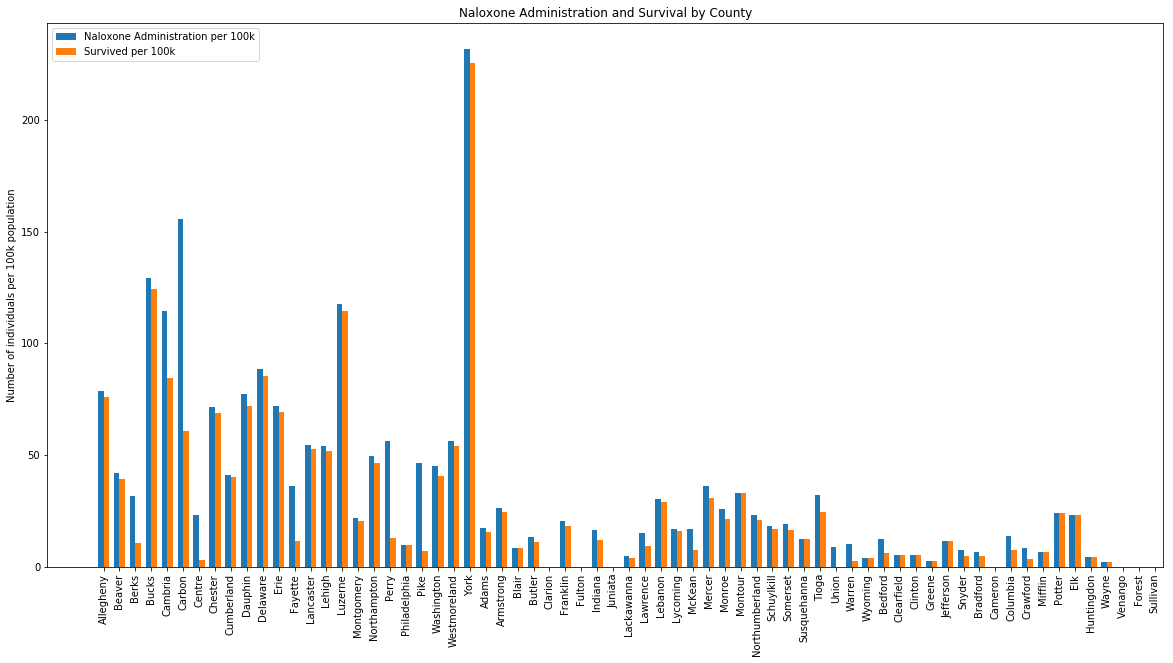

In [30]:
#create bar chart of naloxone admin and survival per county
ind = np.arange(len(comparison["County"]))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (20,10))
rects1 = ax.bar(ind - width/2, comparison["naloxone per 100k"], width, 
                label='Naloxone Administration per 100k')
rects2 = ax.bar(ind + width/2, comparison["survival per 100k"], width, label='Survived per 100k')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of individuals per 100k population')
ax.set_title('Naloxone Administration and Survival by County')
ax.set_xticks(ind)
ax.set_xticklabels(comparison["County"], rotation="vertical")
ax.legend()

plt.savefig("naloxone_and_survival_bycounty.png")
plt.show()


In [31]:
#find mean survival rate for those administered naloxone
mean_survival_naloxone = nal_and_survive["rate"].mean()
mean_survival_naloxone

91.43295038849917

In [34]:
#conduct chi-square test per months
nal_and_survive["expected_admin"]=nal_and_survive["Naloxone_Admin"].mean()
nal_and_survive.head()

# Run the chi square test with stats.chisquare()
stats.chisquare(nal_and_survive['Naloxone_Admin'], nal_and_survive['expected_admin'])

Power_divergenceResult(statistic=405.7632765895533, pvalue=2.7737363174163906e-74)

In [38]:
#conduct chi-square test per county
comparison["expected_admin"]=comparison["naloxone per 100k"].mean()
comparison.head()
comparison = comparison.dropna()

#run the chi square test with stats.chisquare()
stats.chisquare(comparison["naloxone per 100k"], comparison["expected_admin"])

Power_divergenceResult(statistic=3136.6230266352, pvalue=0.0)